# Assignment 2

Our team's code can be found here: https://github.com/eleanor-adachi/ARE212_Materials

## 1. Exercises (Identifying Assumptions for Regression)

### (1) Evaluate the truth of following statement: "In the linear regression $y=X\beta + u$ the usual identifying assumption $E(u|X)=0$ (call this an assumption of "mean independence") implies $(h(X)\cdot u)=0$ for any function $h$ satisfying some regularity conditions related to measurability."

The statement is true. In the context of linear regression $y = X\beta + u$, the assumption $E(u|X) = 0$ is known as the mean independence assumption. It implies that the error term $u$ has an expected value of zero conditional on $X$, indicating no systematic relationship between the error term and the explanatory variables in the model.

Given this assumption, for any function $h(X)$ that is measurable (satisfying the regularity conditions), we can indeed say that $E(h(X) \cdot u) = 0$. This follows from the law of iterated expectations and the properties of conditional expectation.

The argument goes as follows:

1. **Mean Independence Assumption:** $E(u|X) = 0$ means that once $X$ is accounted for, the average of the error term $u$ is zero.

2. **Law of Iterated Expectations:** For a measurable function $h(X)$, we can apply the law of iterated expectations which states that $E(E(u|h(X), X)) = E(u)$.

3. **Applying Conditional Expectation:** Given $E(u|X) = 0$, it holds that $E(u|h(X), X) = E(0|h(X), X) = 0$ because the expectation of a constant (including zero) is that constant.

4. **Resulting Expectation:** Therefore, $E(h(X) \cdot u) = E(E(h(X) \cdot u|X))$ by the law of total expectation. Since $E(u|X) = 0$, it follows that $E(h(X) \cdot u) = E(h(X) \cdot 0) = E(0) = 0$.

### 6. Let $y = X\beta + u$, and let $D$ be a binary random variable with $E(u|D)=0$ and $E(X|D) \neq E(X)$.  Establish that $D$ is a valid instrument, and work out a particularly simple expression for the IV estimator in this case.  Discuss.

To establish that $D$ is a valid instrument in the context of the linear regression model $y = X\beta + u$, we need to check the two main conditions for a valid instrumental variable:

1. **Relevance condition**: The instrument $D$ must be correlated with the endogenous explanatory variable $X$. This is satisfied if $E(X|D) \neq E(X)$, which means that the instrument $D$ affects the value of $X$.

2. **Exogeneity condition**: The instrument $D$ must be uncorrelated with the error term $u$. This is satisfied by the assumption $E(u|D) = 0$, meaning that the instrument does not directly affect the outcome variable $y$ except through $X$.

Given these conditions, $D$ is a valid instrument for $X$ in the regression of $y$ on $X$.

Now, let's derive a simple expression for the IV estimator in this scenario. The IV estimator is given by:

$$\hat{\beta}_{IV} = \frac{Cov(y, D)}{Cov(X, D)}$$

Because $y = X\beta + u$, we can write:

$$Cov(y, D) = Cov(X\beta + u, D)$$

Using the properties of covariance and the assumption that $E(u|D) = 0$, which implies $Cov(u, D) = 0$, we get:

$$Cov(y, D) = Cov(X\beta, D) = \beta Cov(X, D)$$

So, the IV estimator simplifies to:

$$\hat{\beta}_{IV} = \frac{\beta Cov(X, D)}{Cov(X, D)} = \beta$$

In this case, the IV estimator $\hat{\beta}_{IV}$ is just $\beta$, the true parameter we aim to estimate. This outcome reveals an insight into the power of instrumental variables: under ideal conditions (where the instrument is strongly relevant and perfectly exogenous), the IV estimator can directly recover the true parameter without bias introduced by endogeneity in $X$.

$D$ is a valid instrument for estimating $\beta$ in the presence of endogeneity in $X$, and the IV estimator can effectively correct for this endogeneity, yielding an unbiased estimate of $\beta$ under the specified conditions.


### (7) Write out the two causal diagrams which justify, respectively, the least squares estimator and the IV estimator. What would it mean for one model to be correct, but not the other? How could you test this?

For the LSE to be unbiased and consistent, the key assumption is that the explanatory variables $X$ are not correlated with the error term $u$, implying no omitted variable bias or measurement error that correlates with $X$. The causal diagram for this scenario is straightforward:


$y \leftarrow X \rightarrow u$

In this diagram:
- $X$ causes $Y$.
- There is no arrow from $U$ (unobserved factors) to $X$, indicating that $X$ is exogenous.
- $U$ influences $Y$ but is uncorrelated with $X$.

The IV estimator is used when $X$ is endogenous, i.e., correlated with the error term $u$. An instrument $Z$ (satisfying the relevance and exogeneity conditions) is used to estimate the causal effect of $X$ on $Y$. The causal diagram might look like this:

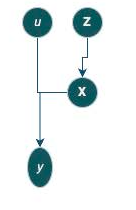

In this diagram:
- $Z$ is the instrument affecting $X$ but does not directly affect $y$ (except through $X$).
- $X$ is endogenous, influenced by some unobserved factors $U$ that also affect $Y$.
- The path $Z → X → y$ allows for the estimation of the causal effect of $X$ on $y$, bypassing the endogeneity issue.

#### When one model is correct, but not the other

If the LSE model is correct but the IV model is not, it implies that $X$ is actually exogenous, and there's no need for an instrument. Using an IV in this scenario might introduce unnecessary complexity and potential for bias if the instrument is not perfectly valid (i.e., it might somehow be related to $Y$ through paths not considered).

Conversely, if the IV model is correct but the LSE model is not, it means that $X$ is endogenous. Relying on LSE would yield biased and inconsistent estimates due to the correlation between $X$ and $u$.

#### Testing model validity

To determine which model is correct, we can consider the following tests and approaches:

- **Hausman Test**: This test can be used to compare the estimates from the LSE and IV approaches. If the estimates significantly differ, it suggests endogeneity in $X$, thus supporting the IV approach.
  
- **Overidentification Test (for IV)**: If you have more instruments than endogenous variables, you can test whether the extra instruments are valid. A failure of this test suggests that at least one instrument is invalid, questioning the IV model's correctness.

- **Exogeneity Tests**: Various tests can assess the exogeneity of $X$, such as testing for correlation between $X$ and the residuals from an IV estimation.



## 2. Wright (1928)

Consider the canonical demand and supply model in which quantity supplied is a function of price and a set of "supply shifters"; quantity demanded is a function of price and set of "demand shifters"; and market clearing implies that at some price quantity demanded is equal to quantity supplied. A linear version of this model is fully specified and solved in [this Jupyter Notebook](https://github.com/ligonteaching/ARE212_Materials/blob/master/wright34.ipynb).

Consider the following questions:

1. (Control) What is the expected demand if we set the price $p = p_0$?

2. (Condition) What is the expected demand if we observe $p = p_0$?

3. (Counterfactual) If prices and quantities are observed to be $(p_0, q_0)$, what would demand be if we were to change the price to $p_1$, ceteris paribus?

Answers could be mathematical expressions, or code that answers the question for the model given in the Jupyter notebook.

### (1) (Control) What is the expected demand if we set the price $p = p_0$?

First, recreate the linear model in [wright34.ipynb](https://github.com/ligonteaching/ARE212_Materials/blob/master/wright34.ipynb) representing:

$$
   q_D = \alpha p + u\qquad q_S = \beta p + v\qquad q_D = q_S,
$$

where $u$ and $v$ have normal distributions of the form:

$F_u(u) = \frac{1}{\sigma \sqrt{2 \pi}} e^{−\frac{(u − \mu)^2}{2\sigma^2}}$

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Structural parameters;
(α,β) = (-1,2)     
σ = {'u':1/2,'v':1/3}
μ = {'u':2,'v':-1}

# u,v assumed independent
u = iid.norm(loc=μ['u'], scale=σ['u'])  # Demand shocks
v = iid.norm(loc=μ['v'], scale=σ['v'])  # Supply shocks

# Reduced form coefficients
π = [[-β/(α - β), -1/(α - β)],
     [ α/(α - β), 1/(α - β)]]

# Generate N realizations of system
# Outcomes Y have columns (q,p)
N = 10

# Arrange shocks into an Nx2 matrix
U = np.c_[u.rvs(N), v.rvs(N)]

# Matrix product gives [q,p]; label by putting into df
df = pd.DataFrame(U@π,columns=['q','p'])
Udf = pd.DataFrame(U,columns=['u','v']) # For future reference

First, visualize by plotting demand curve segments that intersect $p_0$ for different realizations of $u$.

Here, we show $p_0 = 1$.

In [ ]:
import matplotlib.pyplot as plt

p0 = 1

Q = pd.DataFrame({'min': α*(p0-0.3) + Udf['u'],
                  'max': α*(p0+0.3) + Udf['u'],
                  'miss':-1})

# Inverse counterfactual demand & supply (for plotting)
D = Q.add(-Udf['u'],axis=0)/α  

counterfactual=pd.DataFrame({'D':D.stack(),
                             'Q':Q.stack()})

counterfactual=counterfactual.replace(-1,np.nan)

_ = counterfactual.plot(x='Q')
plt.axhline(y = p0, color = 'r', linestyle = '--', label='$p_0$')
plt.ylabel('p')
plt.title('Demand curves for different realizations of $u$')
plt.legend()

Note that setting the price at $p = p_0$ has no effect on the distribution of $u$.

Show probability distribution function of $u$:

In [ ]:
import numpy as np

X = np.linspace(0,4,100).tolist()

plt.plot(X, [u.pdf(z) for z in X])
plt.xlabel('$u$')
plt.ylabel('Probability')
plt.title('Probability Distribution Function of $u$')
plt.show()

Calculate expected demand:

$\mathbb{E}(q_D(p_0)) = \int_{}^{} q_D(p_0, u)dF_u(u)$

In [ ]:
from scipy.integrate import quad

D_exp = quad(lambda x: (α*p0 + x)*u.pdf(x), -np.inf, np.inf)

D_exp

### (2) (Condition) What is the expected demand if we observe $p = p_0$?

Note that many possible combinations of $u$ and $v$ can result in observing $p_0$.

In [ ]:
# Take u as given

# Find v such that p=p0 for given u
v0 = (α - β)*p0 + Udf['u']

Q = pd.DataFrame({'min': np.minimum(α*(p0-0.3) + Udf['u'], β*(p0+0.3) + v0),
                  'max': np.maximum(α*(p0+0.3) + Udf['u'], β*(p0-0.3) + v0),
                  'miss':-1})

# Inverse counterfactual demand & supply (for plotting)
D = Q.add(-Udf['u'],axis=0)/α  
S = Q.add(-v0,axis=0)/β

counterfactual=pd.DataFrame({'S':S.stack(),
                             'D':D.stack(),
                             'Q':Q.stack()})

counterfactual=counterfactual.replace(-1,np.nan)

_ = counterfactual.plot(x='Q')
plt.axhline(y = p0, color = 'r', linestyle = '--', label='$p_0$')
plt.ylabel('p')
plt.title('Possible observed supply and demand at $p_0$')
plt.legend()

Expected quantity demanded:

$\mathbb{E}[q^*(u,v) | q_D(p_0, u)=q_S(p_0, v)]$

Need to find joint probability of $u$ and $v$???

$q^* = -\frac{\beta}{\alpha-\beta}u -\frac{1}{\alpha-\beta}v$

$f_{q^*}(q^*) = f_u(u)|\frac{\partial u}{\partial q^*}| \cdot f_v(v)|\frac{\partial v}{\partial q^*}|$

$f_{q^*}(q^*) = f_u(u)|-\frac{\alpha-\beta}{\beta}| \cdot f_v(v)|-\frac{\alpha-\beta}{1}|$

Let $v = -\beta u - (\alpha - \beta) q^*$

$f_{q^*}(q^*) = \int_{-\infty}^{\infty} -\frac{\alpha-\beta}{\beta} f_u(u) (-\frac{\alpha-\beta}{1}) f_v(-\beta u - (\alpha - \beta) q^*) \,du$

$f_{q^*}(q^*) = \int_{-\infty}^{\infty} \frac{(\alpha-\beta)^2}{\beta} f_u(u) f_v(-\beta u - (\alpha - \beta) q^*) \,du$

Getting messy...

*New approach...*

When $q_S = q_D$, then $\alpha p + u = \beta p + v$

Let $v = u + (\alpha - \beta)p$

$f_{q^*}(u) = f_u(u) \cdot f_v(v)|\frac{\partial v}{\partial u}|$

$\mathbb{E}[q^*(u,v) | q_D(p_0, u)=q_S(p_0, v)] = \int_{}^{} q_D(p_0, u)dF_u(u)dF_v(u + (\alpha - \beta)p)$

In [ ]:
# redefine q_D and v in terms of u
D_exp = quad(lambda x: (α*p0 + x)*u.pdf(x)*v.pdf(x + (α - β)*p0), -np.inf, np.inf)
D_exp

## 6. Angrist-Krueger (1991) Replication

### (1) What is the (implicit) identifying assumption? Comment on its plausibility.

The implicit identifying assumption in Angrist and Krueger's study is that the season of birth (or quarter of birth) is exogenously determined and is not systematically related to other unobserved individual characteristics that affect educational attainment and earnings. This assumption means that being born in a particular part of the year should not directly affect one's educational outcomes or earnings potential, other than through the mechanisms of school entry age and compulsory schooling laws.

This identifying assumption seems highly plausible given that parents are unlikely to be able to precisely plan the birth month of their children. 

It is possible that this assumption could be violated if children born in certain seasons are at different developmental stages when they start school, which could influence their educational progress and, subsequently, their earnings.

### (2) Using their data, estimate (2), replicating the figures in their Table 5, using the conventional two-stage least squares IV estimator (what they call TSLS).

In [186]:
import pandas as pd
import numpy as np
from scipy.linalg import inv, sqrtm
import statsmodels.api as sm
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


# Read in the data file
ak_data = pd.read_stata('../../angrist-krueger91.dta')
# Print distinct years in the data
print(ak_data['yob'].unique()) # Years are already filtered to 1930-1939 cohort
# Add a constant to the data
ak_data = sm.add_constant(ak_data)
# Add dummy variables for each year of birth and each region minus one 
ak_data = pd.get_dummies(ak_data, columns=['yob', 'region', 'qob'], drop_first=True) 
# Dummy variables get coded as boolean - recode as 0/1 dummies
for column in ak_data.columns:
    if ak_data[column].dtype == 'bool':
        ak_data[column] = ak_data[column].astype(int)
ak_data['ageq_sq'] = ak_data['ageq']**2
# Create yob*qob interaction terms
for i in range(9):
    for j in range(3):
        ak_data['yob_193'+str(i+1)+'_qob_'+str(j+2)] = ak_data['yob_193'+str(i+1)]*ak_data['qob_'+str(j+2)]     
# Create outcome variable equal to log wage
y = ak_data[['logwage']]
# Create regressor list for ease when creating regressions
yob_dummies = ['yob_1931', 'yob_1932', 'yob_1933', 'yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939']
region_dummies = ['region_1.0', 'region_2.0', 'region_3.0', 'region_4.0', 'region_5.0', 'region_6.0', 'region_7.0', 'region_8.0']
qob_dummies = ['qob_2', 'qob_3', 'qob_4']
interaction_dummies = [
    'yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4',
    'yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4',
    'yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4',
    'yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4',
    'yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4'
]

# The 'state' variable for some reason goes from 1-56, with some missing values (e.g. 3 is missing).
# We will recode this variable to start from 1 and be sequential
# Get the unique state codes from the 'state' column, sorted
unique_states = sorted(ak_data['state'].unique())
# Create a mapping from old state codes to new sequential codes starting from 1
state_mapping = {old_code: new_code for new_code, old_code in enumerate(unique_states, start=1)}
# Now apply this mapping to the 'state' column to create a new 'state' column
ak_data['state_recode'] = ak_data['state'].map(state_mapping)

# Create dummy variables from the new sequential state column
ak_data = pd.get_dummies(ak_data, columns=['state_recode'], drop_first=True)
# Ensure all boolean columns are converted to integers
for column in ak_data.columns:
    if ak_data[column].dtype == bool:
        ak_data[column] = ak_data[column].astype(int)
        
# Create qob*state interaction terms

# Number of qobs and states
num_qobs = 4
num_states = 51
for i in range(2, num_qobs + 1):  # qobs start from 2 since the first qob is dropped
    for j in range(2, num_states + 1):  # states start from 2 since the first state is dropped
        qob_col = f'qob_{i}'
        state_col = f'state_recode_{j}'
        interaction_col = f'{qob_col}_state_{j}'
        if qob_col in ak_data.columns and state_col in ak_data.columns:
            ak_data[interaction_col] = ak_data[qob_col] * ak_data[state_col]
        else:
            print(f"Column does not exist: {qob_col} or {state_col}")

# Create the state and state_qob_interactions lists
state_dummies = [f'state_recode_{i}' for i in range(2, num_states + 1)]
state_qob_interactions = [f'qob_{i}_state_{j}' for i in range(2, num_qobs + 1) for j in range(2, num_states + 1)]

[1933 1930 1937 1935 1938 1939 1936 1934 1931 1932]


In [187]:
# OLS function
def OLS(Y,X):
    X = np.array(X)
    Y = np.array(Y)
    XX = np.transpose(X)@X
    XX_inv = np.linalg.pinv(XX)
    XY = np.transpose(X)@Y
    Beta_OLS = XX_inv@XY
    N = Y.shape[0]
    resid = Y - X@Beta_OLS 
    resid_var = (np.sum(np.square(resid)))/(N-1)
    var_covar = resid_var*XX_inv 
    K = XX.shape[0]
    SE = np.zeros(K)
    for i in range(K):
          SE[i] = np.sqrt(var_covar[i,i])
    t = (1/SE)*Beta_OLS
    return Beta_OLS, SE, var_covar,t

# IV (2SLS) estimator function:
def IV2SLS(Y,X,Z):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    ZX = np.transpose(Z)@X
    ZX_inv = np.linalg.pinv(ZX)
    ZY = np.transpose(Z)@Y
    ZZ = np.transpose(Z)@Z
    ZZ_inv = np.linalg.pinv(ZZ)
    Beta_IV2SLS = np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)@(np.transpose(ZX)@ZZ_inv@ZY)
    e = Y - X@Beta_IV2SLS
    SSR = np.transpose(e)@e
    N = X.shape[0]
    vcv_IV2SLS = (SSR/N)*np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)
    K = X.shape[1]
    SE_IV2SLS = np.zeros(K)
    for i in range(K):
          SE_IV2SLS[i] = np.sqrt(vcv_IV2SLS[i,i])
    t_IV2SLS = (1/SE_IV2SLS)*Beta_IV2SLS
    return Beta_IV2SLS, SE_IV2SLS, vcv_IV2SLS,t_IV2SLS

In [188]:
# First OLS regression - Column 1
# Regress log wage on a constant, education, and YOB dummies
X1 = ak_data[['const', 'edu'] + yob_dummies]
OLS1 = OLS(y,X1)
Coeff1 = OLS1[0]
SE1 = OLS1[1]
print("Education OLS estimate: ", np.round(Coeff1[1][0],4))
print("Education OLS SE:", np.round(SE1[1],4))


Education OLS estimate:  0.0711
Education OLS SE: 0.0003


In [189]:
# First 2SLS regression - Column 2

# First stage regression of a constant, YOB dummies, QOB dummies, and the interaction of the two
Z1 = ak_data[['const'] + yob_dummies + qob_dummies + interaction_dummies]
TSLS1 = IV2SLS(y,X1,Z1)
Coeff_TSLS1 = TSLS1[0]
SE_TSLS1 = TSLS1[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS1[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS1[1],4))

Education TSLS estimate:  0.0891
Education TSLS SE: 0.0161


In [190]:
# Second OLS Regression - Column 3

X2 = ak_data[['const', 'edu', 'ageq', 'ageq_sq'] + yob_dummies]
OLS2 = OLS(y,X2)
Coeff2 = OLS2[0]
SE2 = OLS2[1]
print("Education OLS estimate: ", np.round(Coeff2[1][0],4))
print("Education OLS SE:", np.round(SE2[1],4))
print("Age OLS estimate: ", np.round(Coeff2[2][0],4))
print("Age OLS SE:", np.round(SE2[2],4))
print("Age Squared OLS estimate: ", np.round(Coeff2[3][0],4))
print("Age Squared OLS SE:", np.round(SE2[3],4))

Education OLS estimate:  0.0711
Education OLS SE: 0.0003
Age OLS estimate:  -0.0772
Age OLS SE: 0.0621
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [191]:
# Second 2SLS - Column 4
Z2 = ak_data[['const', 'ageq', 'ageq_sq'] + yob_dummies + qob_dummies + interaction_dummies]
TSLS2 = IV2SLS(y,X2,Z2)
Coeff_TSLS2 = TSLS2[0]
SE_TSLS2 = TSLS2[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2[1],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS2[2][0],4))
print("Age TSLS SE:", np.round(SE_TSLS2[2],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS2[3][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS2[3],4))

Education TSLS estimate:  0.076
Education TSLS SE: 0.029
Age TSLS estimate:  -0.0801
Age TSLS SE: 0.0645
Age Squared TSLS estimate:  0.0008
Age Squared TSLS SE: 0.0007


In [192]:
# Third OLS - Column 5
X3 = ak_data[['const', 'edu', 'black', 'smsa', 'married'] + yob_dummies + region_dummies]
OLS3 = OLS(y,X3)
Coeff3 = OLS3[0]
SE3 = OLS3[1]
print("Education OLS estimate: ", np.round(Coeff3[1][0],4))
print("Education OLS SE:", np.round(SE3[1],4))
print("Race OLS estimate: ", np.round(Coeff3[2][0],4))
print("Race OLS SE:", np.round(SE3[2],4))
print("SMSA OLS estimate: ", np.round(Coeff3[3][0],4))
print("SMSA OLS SE:", np.round(SE3[3],4))
print("Married OLS estimate: ", np.round(Coeff3[4][0],4))
print("Married OLS SE:", np.round(SE3[4],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032


In [193]:
# Third 2SLS - Column 6
Z3 = ak_data[['const', 'black', 'smsa', 'married'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies]
TSLS3 = IV2SLS(y,X3,Z3)
Coeff_TSLS3 = TSLS3[0]
SE_TSLS3 = TSLS3[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS3[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS3[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS3[2][0],4))
print("Race TSLS SE:", np.round(SE_TSLS3[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS3[3][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS3[3],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS3[4][0],4))
print("Married TSLS SE:", np.round(SE_TSLS3[4],4))

Education TSLS estimate:  0.0806
Education TSLS SE: 0.0164
Race TSLS estimate:  -0.2302
Race TSLS SE: 0.0261
SMSA TSLS estimate:  0.1581
SMSA TSLS SE: 0.0174
Married TSLS estimate:  0.244
Married TSLS SE: 0.0049


In [194]:
# Fourth OLS - Column 7
X4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies]
OLS4 = OLS(y,X4)
Coeff4 = OLS4[0]
SE4 = OLS4[1]
print("Education OLS estimate: ", np.round(Coeff4[1][0],4))
print("Education OLS SE:", np.round(SE4[1],4))
print("Race OLS estimate: ", np.round(Coeff4[2][0],4))
print("Race OLS SE:", np.round(SE4[2],4))
print("SMSA OLS estimate: ", np.round(Coeff4[3][0],4))
print("SMSA OLS SE:", np.round(SE4[3],4))
print("Married OLS estimate: ", np.round(Coeff4[4][0],4))
print("Married OLS SE:", np.round(SE4[4],4))
print("Age OLS estimate: ", np.round(Coeff4[5][0],4))
print("Age OLS SE:", np.round(SE4[5],4))
print("Age Squared OLS estimate: ", np.round(Coeff4[6][0],4))
print("Age Squared OLS SE:", np.round(SE4[6],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032
Age OLS estimate:  -0.076
Age OLS SE: 0.0604
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [195]:
# Fourth 2SLS - Column 8
Z4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies]
TSLS4 = IV2SLS(y,X4,Z4)
Coeff_TSLS4 = TSLS4[0]
SE_TSLS4 = TSLS4[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS4[1][0],5))
print("Education TSLS SE:", np.round(SE_TSLS4[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS4[2][0],4))
print("Race TSLS SE:", np.round(SE_TSLS4[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS4[3][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS4[3],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS4[4][0],4))
print("Married TSLS SE:", np.round(SE_TSLS4[4],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS4[5][0],4))
print("Age TSLS SE:", np.round(SE_TSLS4[5],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS4[6][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS4[6],4))

Education TSLS estimate:  0.05995
Education TSLS SE: 0.029
Race TSLS estimate:  -0.2626
Race TSLS SE: 0.0458
SMSA TSLS estimate:  0.1797
SMSA TSLS SE: 0.0305
Married TSLS estimate:  0.2486
Married TSLS SE: 0.0073
Age TSLS estimate:  -0.0741
Age TSLS SE: 0.0626
Age Squared TSLS estimate:  0.0007
Age Squared TSLS SE: 0.0007


### (3) Repeat (2), but for the specification reported in their Table 7 (which has many more instruments). Summarize what the above exercises tell us about returns to education.

In [196]:
# First OLS regression - Column 1
# Regress log wage on a constant, education, and YOB dummies
X2_1 = ak_data[['const', 'edu'] + yob_dummies + state_dummies] 
OLS2_1 = OLS(y,X2_1)
Coeff2_1 = OLS2_1[0]
SE2_1 = OLS2_1[1]
print("Education OLS estimate: ", np.round(Coeff2_1[1][0],4))
print("Education OLS SE:", np.round(SE2_1[1],4))


Education OLS estimate:  0.0673
Education OLS SE: 0.0003


In [197]:
# First 2SLS regression - Column 2

Z2_1 = ak_data[['const'] + yob_dummies + qob_dummies + state_qob_interactions + interaction_dummies]
TSLS2_1 = IV2SLS(y,X2_1,Z2_1)
Coeff_TSLS2_1 = TSLS2_1[0]
SE_TSLS2_1 = TSLS2_1[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2_1[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2_1[1],4))

Education TSLS estimate:  0.0976
Education TSLS SE: 0.0103


In [198]:
# Second OLS Regression - Column 3

X2_2 = ak_data[['const', 'edu', 'ageq', 'ageq_sq'] + yob_dummies + state_dummies] 
OLS2_2 = OLS(y,X2_2)
Coeff2_2 = OLS2_2[0]
SE2_2 = OLS2_2[1]
print("Education OLS estimate: ", np.round(Coeff2_2[1][0],4))
print("Education OLS SE:", np.round(SE2_2[1],4))
print("Age OLS estimate: ", np.round(Coeff2_2[2][0],4))
print("Age OLS SE:", np.round(SE2_2[2],4))
print("Age Squared OLS estimate: ", np.round(Coeff2_2[3][0],4))
print("Age Squared OLS SE:", np.round(SE2_2[3],4))

Education OLS estimate:  0.0673
Education OLS SE: 0.0003
Age OLS estimate:  -0.0757
Age OLS SE: 0.0617
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [199]:
# Second 2SLS - Column 4
Z2_2 = ak_data[['const', 'ageq', 'ageq_sq'] + yob_dummies + qob_dummies + state_qob_interactions + state_dummies + interaction_dummies]
TSLS2_2 = IV2SLS(y,X2_2,Z2_2)
Coeff_TSLS2_2 = TSLS2_2[0]
SE_TSLS2_2 = TSLS2_2[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2_2[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2_2[1],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS2_2[2][0],4))
print("Age TSLS SE:", np.round(SE_TSLS2_2[2],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS2_2[3][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS2_2[3],4))

Education TSLS estimate:  0.0907
Education TSLS SE: 0.0107
Age TSLS estimate:  -0.088
Age TSLS SE: 0.0624
Age Squared TSLS estimate:  0.0009
Age Squared TSLS SE: 0.0007


In [200]:
# Third OLS - Column 5
X2_3 = ak_data[['const', 'edu', 'black', 'smsa', 'married'] + yob_dummies + region_dummies + state_dummies]
OLS2_3 = OLS(y,X2_3)
Coeff2_3 = OLS2_3[0]
SE2_3 = OLS2_3[1]
print("Education OLS estimate: ", np.round(Coeff2_3[1][0],4))
print("Education OLS SE:", np.round(SE2_3[1],4))
print("Race OLS estimate: ", np.round(Coeff2_3[2][0],4))
print("Race OLS SE:", np.round(SE2_3[2],4))
print("SMSA OLS estimate: ", np.round(Coeff2_3[3][0],4))
print("SMSA OLS SE:", np.round(SE2_3[3],4))
print("Married OLS estimate: ", np.round(Coeff2_3[4][0],4))
print("Married OLS SE:", np.round(SE2_3[4],4))

Education OLS estimate:  0.0628
Education OLS SE: 0.0003
Race OLS estimate:  -0.2547
Race OLS SE: 0.0043
SMSA OLS estimate:  0.1705
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2487
Married OLS SE: 0.0032


In [201]:
# Third 2SLS - Column 6
Z2_3 = ak_data[['const', 'black', 'smsa', 'married'] + yob_dummies +  region_dummies + qob_dummies + state_dummies + state_qob_interactions + interaction_dummies]
TSLS2_3 = IV2SLS(y,X2_3,Z2_3)
Coeff2_TSLS3 = TSLS2_3[0]
SE2_TSLS3 = TSLS2_3[1]
print("Education TSLS estimate: ", np.round(Coeff2_TSLS3[1][0],4))
print("Education TSLS SE:", np.round(SE2_TSLS3[1],4))
print("Race TSLS estimate: ", np.round(Coeff2_TSLS3[2][0],4))
print("Race TSLS SE:", np.round(SE2_TSLS3[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff2_TSLS3[3][0],4))
print("SMSA TSLS SE:", np.round(SE2_TSLS3[3],4))
print("Married TSLS estimate: ", np.round(Coeff2_TSLS3[4][0],4))
print("Married TSLS SE:", np.round(SE2_TSLS3[4],4))

Education TSLS estimate:  0.0831
Education TSLS SE: 0.0095
Race TSLS estimate:  -0.2333
Race TSLS SE: 0.0109
SMSA TSLS estimate:  0.1511
SMSA TSLS SE: 0.0095
Married TSLS estimate:  0.2435
Married TSLS SE: 0.004


In [202]:
# Fourth OLS - Column 7
X2_4 = ak_data[['const', 'edu', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + state_dummies]
OLS2_4 = OLS(y,X2_4)
Coeff2_4 = OLS2_4[0]
SE2_4 = OLS2_4[1]
print("Education OLS estimate: ", np.round(Coeff2_4[1][0],4))
print("Education OLS SE:", np.round(SE2_4[1],4))
print("Race OLS estimate: ", np.round(Coeff2_4[2][0],4))
print("Race OLS SE:", np.round(SE2_4[2],4))
print("SMSA OLS estimate: ", np.round(Coeff2_4[3][0],4))
print("SMSA OLS SE:", np.round(SE2_4[3],4))
print("Married OLS estimate: ", np.round(Coeff2_4[4][0],4))
print("Married OLS SE:", np.round(SE2_4[4],4))
print("Age OLS estimate: ", np.round(Coeff2_4[5][0],4))
print("Age OLS SE:", np.round(SE2_4[5],4))
print("Age Squared OLS estimate: ", np.round(Coeff2_4[6][0],4))
print("Age Squared OLS SE:", np.round(SE2_4[6],4))

Education OLS estimate:  0.0628
Education OLS SE: 0.0003
Race OLS estimate:  -0.2547
Race OLS SE: 0.0043
SMSA OLS estimate:  0.1705
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2487
Married OLS SE: 0.0032
Age OLS estimate:  -0.0778
Age OLS SE: 0.0603
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [203]:
# Fourth 2SLS - Column 8
Z2_4 = ak_data[['const', 'black', 'smsa', 'married', 'ageq', 'ageq_sq'] + yob_dummies + region_dummies + qob_dummies + interaction_dummies + state_dummies + state_qob_interactions]
TSLS2_4 = IV2SLS(y,X2_4,Z2_4)
Coeff2_TSLS4 = TSLS2_4[0]
SE2_TSLS4 = TSLS2_4[1]
print("Education TSLS estimate: ", np.round(Coeff2_TSLS4[1][0],5))
print("Education TSLS SE:", np.round(SE2_TSLS4[1],4))
print("Race TSLS estimate: ", np.round(Coeff2_TSLS4[2][0],4))
print("Race TSLS SE:", np.round(SE2_TSLS4[2],4))
print("SMSA TSLS estimate: ", np.round(Coeff2_TSLS4[3][0],4))
print("SMSA TSLS SE:", np.round(SE2_TSLS4[3],4))
print("Married TSLS estimate: ", np.round(Coeff2_TSLS4[4][0],4))
print("Married TSLS SE:", np.round(SE2_TSLS4[4],4))
print("Age TSLS estimate: ", np.round(Coeff2_TSLS4[5][0],4))
print("Age TSLS SE:", np.round(SE2_TSLS4[5],4))
print("Age Squared TSLS estimate: ", np.round(Coeff2_TSLS4[6][0],4))
print("Age Squared TSLS SE:", np.round(SE2_TSLS4[6],4))

Education TSLS estimate:  0.08106
Education TSLS SE: 0.0109
Race TSLS estimate:  -0.2354
Race TSLS SE: 0.0122
SMSA TSLS estimate:  0.1531
SMSA TSLS SE: 0.0107
Married TSLS estimate:  0.2441
Married TSLS SE: 0.0042
Age TSLS estimate:  -0.0876
Age TSLS SE: 0.0609
Age Squared TSLS estimate:  0.0009
Age Squared TSLS SE: 0.0007


#### Summarize what the above exercises tell us about returns to education.

The above exercises tell us that an extra year of education significantly increases average wages. All of the regressions specifications include a positive coefficient on years of education. The TSLS estimates in table 7 are significantly larger than the OLS estimates. This indicates that the OLS estimates may be biased downward due to omitted variable bias, such as family background or ability. The 2SLS estimates suggest that the returns to education might be understated when not considering the endogenous nature of educational attainment. 